### Comparison between Hodgkin Huxley, LIF and AdEx on 8 sweeps of Ramp stimulus on Frontal Lobe of 25 yr old male with epilepsy: Results

***
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from brian2 import *
from brian2modelfitting import *
# from general_functions import *

WARNING    c:\Users\yjk16\anaconda3\envs\brianfit_env\lib\site-packages\brian2modelfitting\utils.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
 [py.warnings]


In [2]:
from general_functions import *

In [3]:
# sweep nos: 4, 5, 6 from Allen (full input plus additional for shorter arrays)
in_current_ramp = pd.read_csv('ramp_in_full.csv', index_col=0).to_numpy()
out_response_ramp = pd.read_csv('ramp_out_full.csv', index_col=0).to_numpy()

ramp_full_in_amps = in_current_ramp * 10**-12
ramp_full_out = out_response_ramp

In [46]:
reshaped_ramp_sweep0_in, reshaped_ramp_sweep0_out = reshape_data(ramp_full_in_amps[0], ramp_full_out[0])
reshaped_ramp_sweep1_in, reshaped_ramp_sweep1_out = reshape_data(ramp_full_in_amps[1], ramp_full_out[1])
reshaped_ramp_sweep2_in, reshaped_ramp_sweep2_out = reshape_data(ramp_full_in_amps[2], ramp_full_out[2])

***
***

# Initial analysis

***

Text(0.5, 1.0, 'Initial input and output: Ramp, sweep 0')

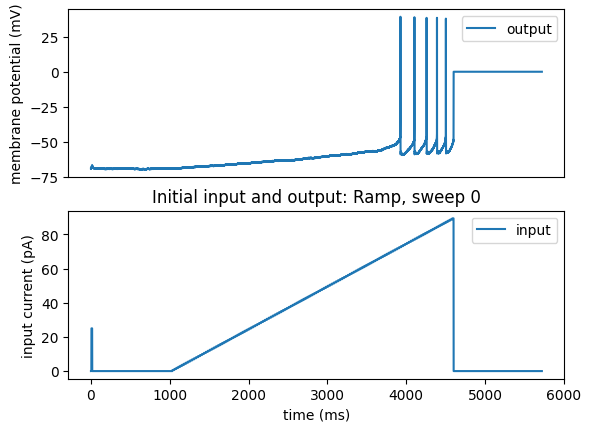

In [ ]:
plot_vertical_fit(ramp_full_out[0], ramp_full_in_amps[0]*10**12)
title('Initial input and output: Ramp, sweep 0')

Text(0.5, 1.0, 'Initial input and output: Ramp, sweep 1')

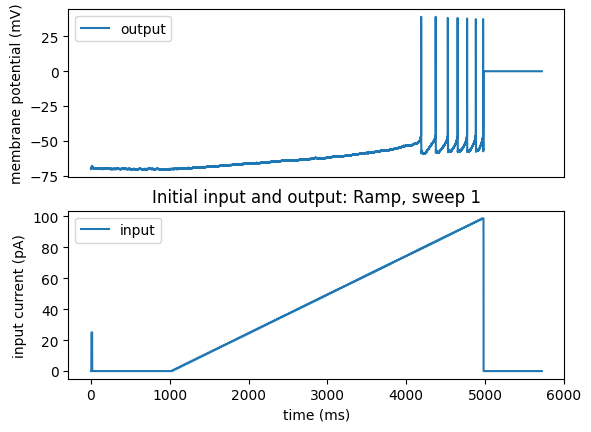

In [5]:
plot_vertical_fit(ramp_full_out[1], ramp_full_in_amps[1]*10**12)
title('Initial input and output: Ramp, sweep 1')

Text(0.5, 1.0, 'Initial input and output: Ramp, sweep 2')

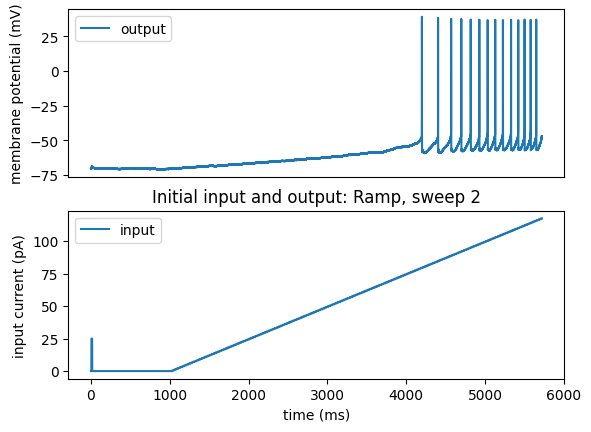

In [6]:
plot_vertical_fit(ramp_full_out[2], ramp_full_in_amps[2]*10**12)
title('Initial input and output: Ramp, sweep 2')

([], [])

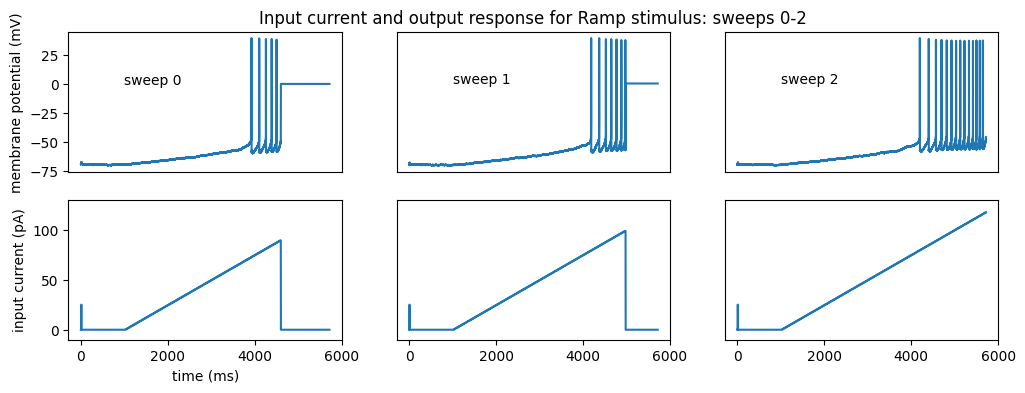

In [18]:
figure(figsize=(12,4))

ts = (np.arange(0, len(ramp_full_in_amps[0]))) * (1/50)

subplot(2,3,1)
plot(ts, ramp_full_out[0])
text(1000, 0, 'sweep 0')
tick_params(
axis='x',          
which='both',      
bottom=False,      
top=False,         
labelbottom=False)
# xlabel('time (ms)')
ylabel('membrane potential (mV)')
# ylabel('input current (pA)')
# title(f'Input current and output response for sweeps {initial_ind} - {initial_ind+4}')

subplot(2,3,2)
plot(ts, ramp_full_out[1])
text(1000, 0, 'sweep 1')
title(f'Input current and output response for Ramp stimulus: sweeps 0-2')
tick_params(
axis='x',          
which='both',     
bottom=False,      
top=False,         
labelbottom=False)
yticks([])

subplot(2,3,3)
plot(ts, ramp_full_out[2])
text(1000, 0, 'sweep 2')
tick_params(
axis='x',          
which='both',      
bottom=False,      
top=False,         
labelbottom=False)
yticks([])

subplot(2,3,4)
plot(ts, in_current_ramp[0])
ylim(-10, 130)
xlabel('time (ms)')
ylabel('input current (pA)')
# tick_params(
# axis='x',          
# which='both',      
# bottom=False,      
# top=False,         
# labelbottom=False)
# yticks([])

subplot(2,3,5)
plot(ts, in_current_ramp[1])
ylim(-10, 130)
# tick_params(
# axis='x',          
# which='both',      
# bottom=False,      
# top=False,         
# labelbottom=False)
yticks([])

subplot(2,3,6)
plot(ts, in_current_ramp[2])
ylim(-10, 130)
# xlabel('time (ms)')
# ylabel('input current (pA)')
yticks([])
# ylabel('membrane potential (mV)')






# subplot(2,5,7)
# plot(ts, outpt[initial_ind+1])
# yticks([])

# subplot(2,5,8)
# plot(ts, outpt[initial_ind+2])
# yticks([])

# subplot(2,5,9)
# plot(ts, outpt[initial_ind+3])
# yticks([])

# subplot(2,5,10)
# plot(ts, outpt[initial_ind+4])
# yticks([])


***
***

# Run models

***
***

# LIF 

***

In [ ]:
lif_ramp_full_0 = run_lif(ramp_full_in_amps, ramp_full_out)

# tt: 6m 49.4s

WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


first fit:
Round 0: Best parameters R=181.39242644 Mohm, tau=26.49168128 ms (error: 535.30378901 mV^2)
Round 1: Best parameters R=189.25884271 Mohm, tau=27.47665745 ms (error: 534.93067095 mV^2)
Round 2: Best parameters R=185.98883048 Mohm, tau=28.93881692 ms (error: 534.55215313 mV^2)
Round 3: Best parameters R=183.84400308 Mohm, tau=29.34391193 ms (error: 534.48765349 mV^2)
Round 4: Best parameters R=190.95968719 Mohm, tau=29.48155938 ms (error: 534.39558014 mV^2)
Round 5: Best parameters R=188.9221017 Mohm, tau=29.63121119 ms (error: 534.34482799 mV^2)
Round 6: Best parameters R=189.61412552 Mohm, tau=29.69464932 ms (error: 534.32848263 mV^2)
Round 7: Best parameters R=190.14425484 Mohm, tau=29.81569436 ms (error: 534.29771411 mV^2)
Round 8: Best parameters R=189.22866044 Mohm, tau=29.85267038 ms (error: 534.28479292 mV^2)
Round 9: Best parameters R=189.61597508 Mohm, tau=29.89115903 ms (error: 534.27499153 mV^2)


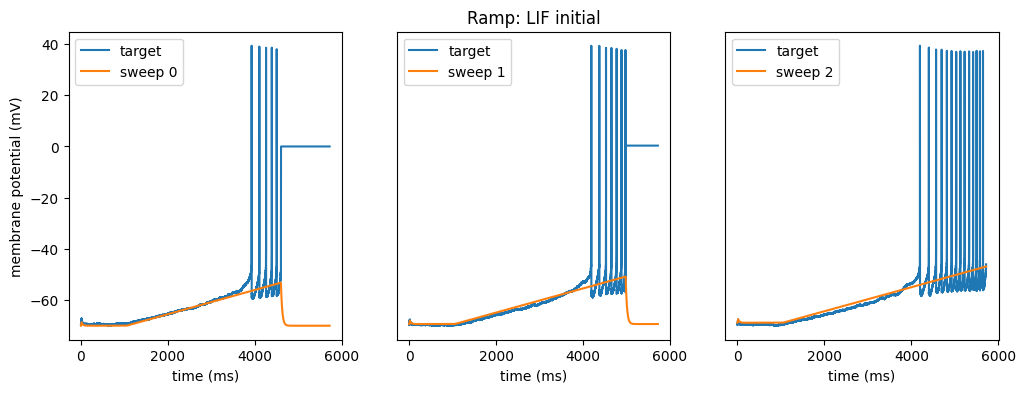

In [20]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(ramp_full_out[0], lif_ramp_full_0[0]*1000, d2_title='sweep 0')


subplot(1,3,2)
create_comparison_together(ramp_full_out[1], lif_ramp_full_0[1]*1000, d2_title='sweep 1')
title('Ramp: LIF initial')
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)


subplot(1,3,3)
create_comparison_together(ramp_full_out[2], lif_ramp_full_0[2]*1000, d2_title='sweep 2')
ax = plt.gca()
ax.yaxis.set_visible(False)

In [ ]:
lif_ramp_full_2 = run_lif(ramp_full_in_amps, ramp_full_out, reset_var='v=-60*mV', thresh_var='v>-50*mV')

# tt: 7m 53s

first fit:
Round 0: Best parameters R=193.77399028 Mohm, tau=26.15608311 ms (error: 535.14615617 mV^2)
Round 1: Best parameters R=191.21095849 Mohm, tau=26.61093456 ms (error: 534.92597579 mV^2)
Round 2: Best parameters R=190.74869193 Mohm, tau=27.8947891 ms (error: 534.50315922 mV^2)
Round 3: Best parameters R=193.77399028 Mohm, tau=28.45785992 ms (error: 534.49524665 mV^2)
Round 4: Best parameters R=190.73851205 Mohm, tau=28.97593404 ms (error: 534.28695142 mV^2)
Round 5: Best parameters R=182.88987596 Mohm, tau=29.28069599 ms (error: 534.21315118 mV^2)
Round 6: Best parameters R=194.44651935 Mohm, tau=29.44442296 ms (error: 534.10285322 mV^2)
Round 7: Best parameters R=200.59327659 Mohm, tau=29.46677217 ms (error: 534.04742808 mV^2)
Round 8: Best parameters R=200.59327659 Mohm, tau=29.61289648 ms (error: 533.99487416 mV^2)
Round 9: Best parameters R=199.40771359 Mohm, tau=29.6714567 ms (error: 533.97718047 mV^2)


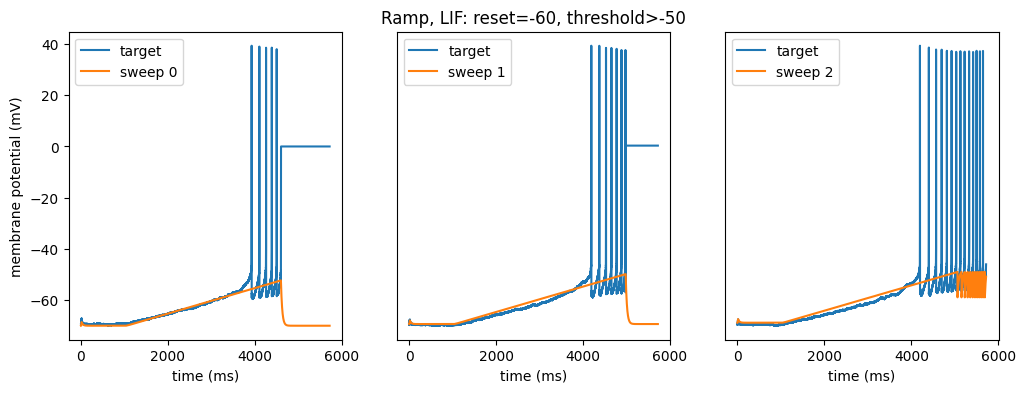

In [22]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(ramp_full_out[0], lif_ramp_full_2[0]*1000, d2_title='sweep 0')


subplot(1,3,2)
create_comparison_together(ramp_full_out[1], lif_ramp_full_2[1]*1000, d2_title='sweep 1')
title('Ramp, LIF: reset=-60, threshold>-50')
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)


subplot(1,3,3)
create_comparison_together(ramp_full_out[2], lif_ramp_full_2[2]*1000, d2_title='sweep 2')
ax = plt.gca()
ax.yaxis.set_visible(False)

(-65.0, -40.0)

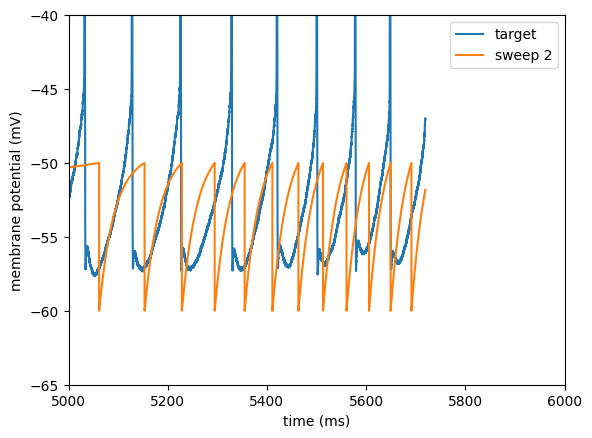

In [25]:
create_comparison_together(ramp_full_out[2], lif_ramp_full_2[2]*1000, d2_title='sweep 2')
xlim(5000, 6000)
ylim(-65, -40)

# BEST LIF?

In [ ]:
lif_ramp_full_17 = run_lif(ramp_full_in_amps, ramp_full_out, reset_var='v=-72*mV', thresh_var='v>-62*mV',\
                           r_min=100*10**6, r_max=110*10**6, t_max=0.05)

# tt: 10m 13.8s

first fit:
Round 0: Best parameters R=101.97070659 Mohm, tau=37.6569714 ms (error: 568.78837159 mV^2)
Round 1: Best parameters R=101.3371265 Mohm, tau=46.41472195 ms (error: 567.56519742 mV^2)
Round 2: Best parameters R=101.3371265 Mohm, tau=46.41472195 ms (error: 567.56519742 mV^2)
Round 3: Best parameters R=100.67437402 Mohm, tau=44.7515205 ms (error: 567.51643399 mV^2)
Round 4: Best parameters R=100.67437402 Mohm, tau=44.7515205 ms (error: 567.51643399 mV^2)
Round 5: Best parameters R=100.67437402 Mohm, tau=44.7515205 ms (error: 567.51643399 mV^2)
Round 6: Best parameters R=100.67437402 Mohm, tau=44.7515205 ms (error: 567.51643399 mV^2)
Round 7: Best parameters R=100.67437402 Mohm, tau=44.7515205 ms (error: 567.51643399 mV^2)
Round 8: Best parameters R=100.67437402 Mohm, tau=44.7515205 ms (error: 567.51643399 mV^2)
Round 9: Best parameters R=100.65430975 Mohm, tau=44.61529845 ms (error: 567.48747394 mV^2)


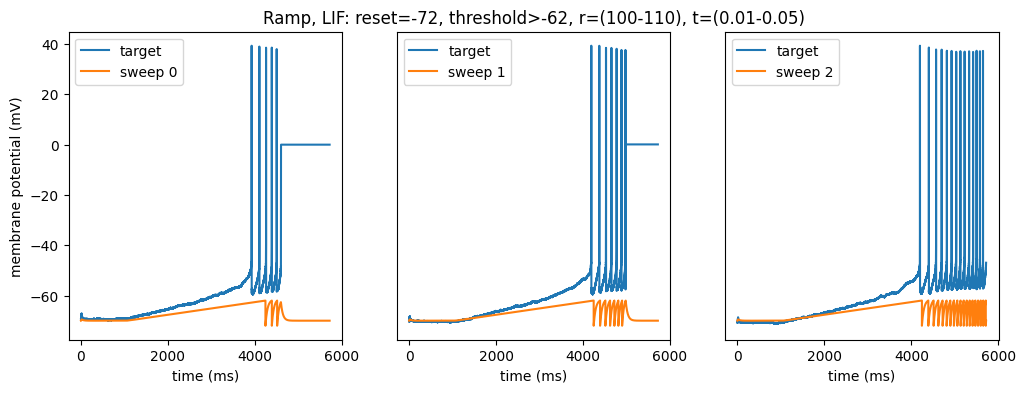

In [27]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(ramp_full_out[0], lif_ramp_full_17[0]*1000, d2_title='sweep 0')


subplot(1,3,2)
create_comparison_together(ramp_full_out[1], lif_ramp_full_17[1]*1000, d2_title='sweep 1')
title('Ramp, LIF: reset=-72, threshold>-62, r=(100-110), t=(0.01-0.05)')
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)


subplot(1,3,3)
create_comparison_together(ramp_full_out[2], lif_ramp_full_17[2]*1000, d2_title='sweep 2')
ax = plt.gca()
ax.yaxis.set_visible(False)

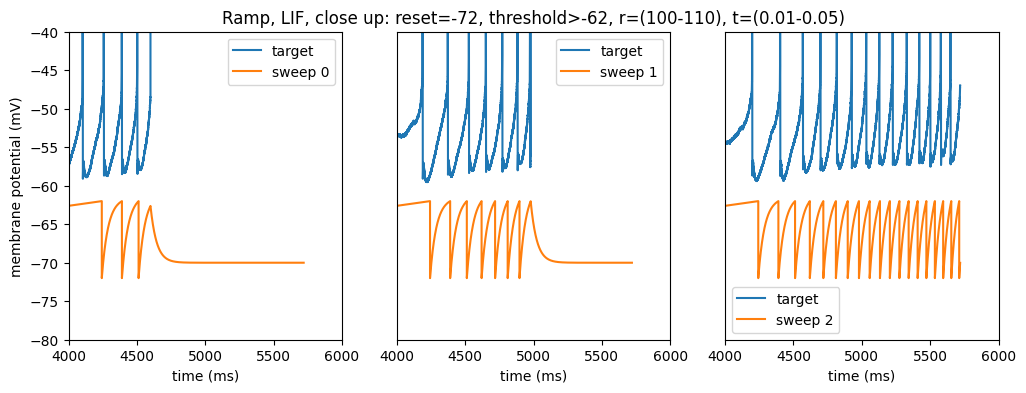

In [26]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(ramp_full_out[0], lif_ramp_full_17[0]*1000, d2_title='sweep 0')
xlim(4_000, 6_000)
ylim(-80, -40)

subplot(1,3,2)
create_comparison_together(ramp_full_out[1], lif_ramp_full_17[1]*1000, d2_title='sweep 1')
xlim(4_000, 6_000)
ylim(-80, -40)
title('Ramp, LIF, close up: reset=-72, threshold>-62, r=(100-110), t=(0.01-0.05)')
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)

subplot(1,3,3)
create_comparison_together(ramp_full_out[2], lif_ramp_full_17[2]*1000, d2_title='sweep 2')
xlim(4_000, 6_000)
ylim(-80, -40)
ax = plt.gca()
ax.yaxis.set_visible(False)

***
***

# AdEx

In [ ]:
adex_ramp_full_0 = run_adex(ramp_full_in_amps, ramp_full_out)

# tt: 13m 50.4s

first fit:
Round 0: Best parameters a=1.38847791 nS, b=184.36929253 pA, tauw=130.4947751 ms (error: 545.78803509 mV^2)
Round 1: Best parameters a=1.28010038 nS, b=117.83445971 pA, tauw=124.11384318 ms (error: 544.78952858 mV^2)
Round 2: Best parameters a=1.25801536 nS, b=0.37047775 nA, tauw=123.41768572 ms (error: 544.6255763 mV^2)
Round 3: Best parameters a=1.1709133 nS, b=49.61022785 pA, tauw=122.15498271 ms (error: 544.27588145 mV^2)
Round 4: Best parameters a=1.11225367 nS, b=60.44804105 pA, tauw=121.29322963 ms (error: 544.23011116 mV^2)
Round 5: Best parameters a=1.08400631 nS, b=33.75048108 pA, tauw=120.84625616 ms (error: 543.62012938 mV^2)
Round 6: Best parameters a=1.06590928 nS, b=22.58564008 pA, tauw=121.40232101 ms (error: 543.33809311 mV^2)
Round 7: Best parameters a=1.06373978 nS, b=19.95796312 pA, tauw=121.00839176 ms (error: 543.26684401 mV^2)
Round 8: Best parameters a=1.06373978 nS, b=19.95796312 pA, tauw=121.00839176 ms (error: 543.26684401 mV^2)
Round 9: Best param

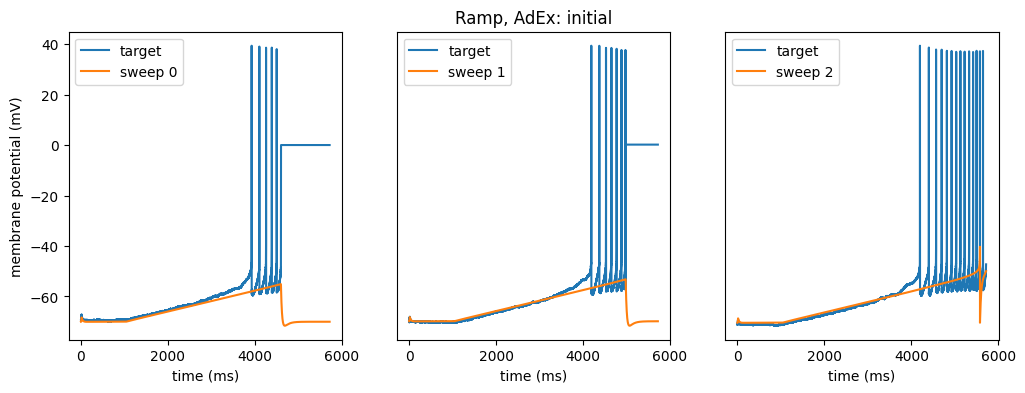

In [29]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(ramp_full_out[0], adex_ramp_full_0[0]*1000, d2_title='sweep 0')


subplot(1,3,2)
create_comparison_together(ramp_full_out[1], adex_ramp_full_0[1]*1000, d2_title='sweep 1')
title('Ramp, AdEx: initial')
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)


subplot(1,3,3)
create_comparison_together(ramp_full_out[2], adex_ramp_full_0[2]*1000, d2_title='sweep 2')
ax = plt.gca()
ax.yaxis.set_visible(False)

# BEST ADEX?

In [ ]:
adex_ramp_full_1 = run_adex(ramp_full_in_amps, ramp_full_out, vt_var=-60)

# tt: 8m 36s

first fit:
Round 0: Best parameters a=2.78339083 nS, b=60.63183857 pA, tauw=127.8171885 ms (error: 582.51975844 mV^2)
Round 1: Best parameters a=3.71458391 nS, b=56.82577685 pA, tauw=151.82220596 ms (error: 579.86145202 mV^2)
Round 2: Best parameters a=3.54382694 nS, b=35.40893387 pA, tauw=146.07421489 ms (error: 575.99468235 mV^2)
Round 3: Best parameters a=3.29747107 nS, b=23.43019159 pA, tauw=128.77763989 ms (error: 573.98136563 mV^2)
Round 4: Best parameters a=3.65670893 nS, b=23.06104569 pA, tauw=122.47162713 ms (error: 568.7907652 mV^2)
Round 5: Best parameters a=3.80080826 nS, b=19.18829418 pA, tauw=122.31874714 ms (error: 567.8957228 mV^2)
Round 6: Best parameters a=3.71531176 nS, b=14.634751 pA, tauw=122.33476946 ms (error: 566.38337538 mV^2)
Round 7: Best parameters a=3.79017188 nS, b=13.15956649 pA, tauw=121.87344568 ms (error: 566.0738119 mV^2)
Round 8: Best parameters a=3.51619017 nS, b=11.69574269 pA, tauw=121.61511489 ms (error: 565.9903061 mV^2)
Round 9: Best parameters

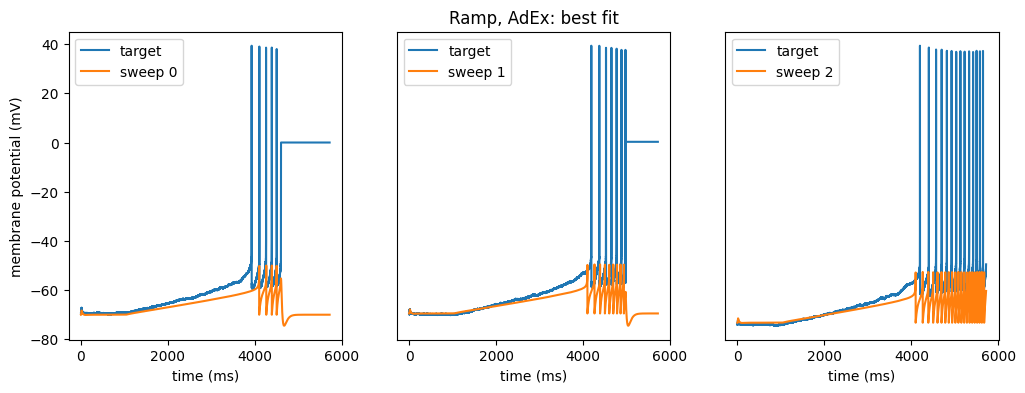

In [31]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(ramp_full_out[0], adex_ramp_full_1[0]*1000, d2_title='sweep 0')


subplot(1,3,2)
create_comparison_together(ramp_full_out[1], adex_ramp_full_1[1]*1000, d2_title='sweep 1')
title('Ramp, AdEx: best fit')
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)


subplot(1,3,3)
create_comparison_together(ramp_full_out[2], adex_ramp_full_1[2]*1000, d2_title='sweep 2')
ax = plt.gca()
ax.yaxis.set_visible(False)

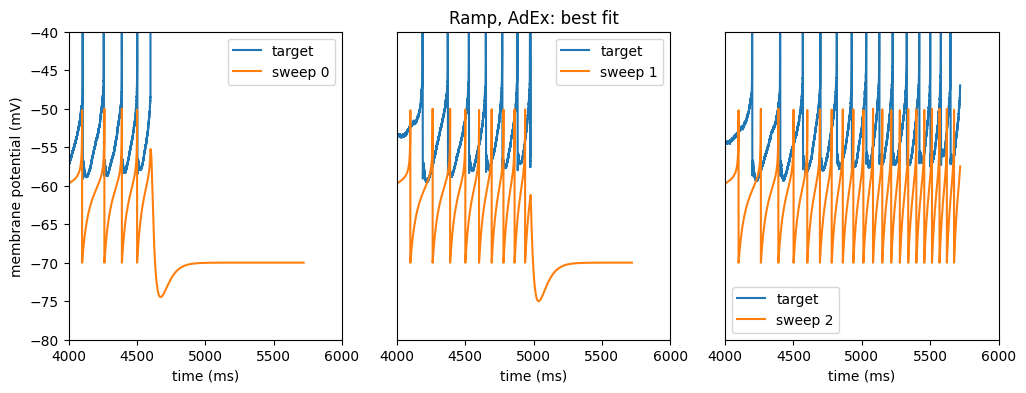

In [32]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(ramp_full_out[0], adex_ramp_full_1[0]*1000, d2_title='sweep 0')
xlim(4_000, 6_000)
ylim(-80, -40)

subplot(1,3,2)
create_comparison_together(ramp_full_out[1], adex_ramp_full_1[1]*1000, d2_title='sweep 1')
xlim(4_000, 6_000)
ylim(-80, -40)
title('Ramp, AdEx: best fit')
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)


subplot(1,3,3)
create_comparison_together(ramp_full_out[2], adex_ramp_full_1[2]*1000, d2_title='sweep 2')
xlim(4_000, 6_000)
ylim(-80, -40)
ax = plt.gca()
ax.yaxis.set_visible(False)

***
***

# HH

In [ ]:
hh_ramp_full_1 = run_hh(ramp_full_in_amps, ramp_full_out, ek=-60, vt=-55, glmin=0, glmax=10)

# tt: 35m 43.8s

first fit:
Round 0: Best parameters g_kd=0.73408628 uS, g_na=16.0242326 uS, gl=4.52156842 nS (error: 389.32874313 mV^2)
Round 1: Best parameters g_kd=0.34314765 uS, g_na=12.97108098 uS, gl=5.71568368 nS (error: 183.59608531 mV^2)
Round 2: Best parameters g_kd=0.34314765 uS, g_na=12.97108098 uS, gl=5.71568368 nS (error: 183.59608531 mV^2)
Round 3: Best parameters g_kd=0.43848404 uS, g_na=12.97108098 uS, gl=5.71568368 nS (error: 177.6629423 mV^2)
Round 4: Best parameters g_kd=0.43848404 uS, g_na=12.97108098 uS, gl=5.71568368 nS (error: 177.6629423 mV^2)
Round 5: Best parameters g_kd=0.43848404 uS, g_na=12.97108098 uS, gl=5.71568368 nS (error: 177.6629423 mV^2)
Round 6: Best parameters g_kd=0.43848404 uS, g_na=12.97108098 uS, gl=5.71568368 nS (error: 177.6629423 mV^2)
Round 7: Best parameters g_kd=0.34629843 uS, g_na=8.43017141 uS, gl=5.4868147 nS (error: 169.65301377 mV^2)
Round 8: Best parameters g_kd=253.83640494 nS, g_na=4.16675392 uS, gl=5.12458322 nS (error: 161.77829702 mV^2)
Round

Text(0.5, 1.0, 'Ramp sweep 0: ek=-60, vt=-55')

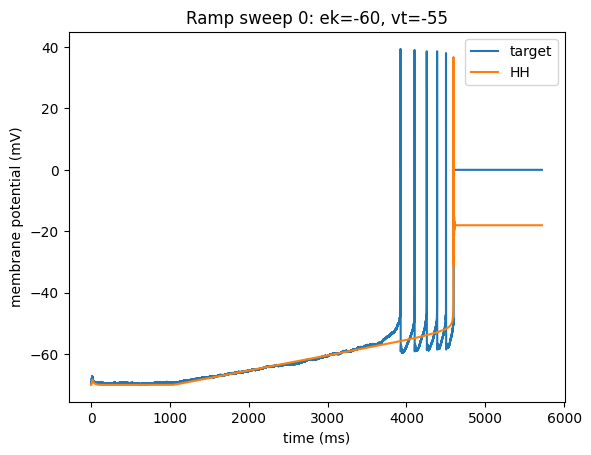

In [34]:
create_comparison_together(ramp_full_out[0], hh_ramp_full_1[0]*1000, d2_title='HH')
title('Ramp sweep 0: ek=-60, vt=-55')

Text(0.5, 1.0, 'Ramp sweep 1: ek=-60, vt=-55')

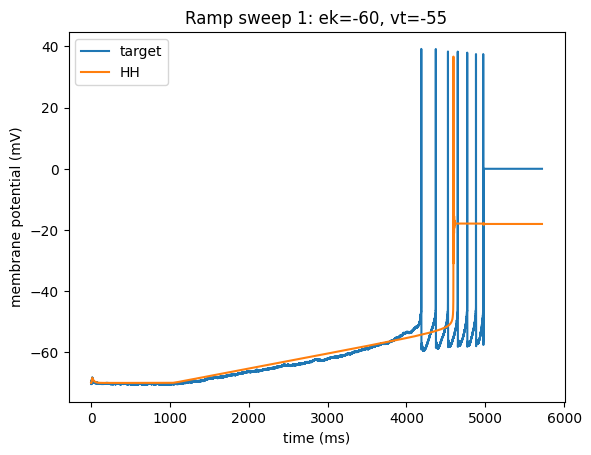

In [35]:
create_comparison_together(ramp_full_out[1], hh_ramp_full_1[1]*1000, d2_title='HH')
title('Ramp sweep 1: ek=-60, vt=-55')

Text(0.5, 1.0, 'Ramp sweep 2: ek=-60, vt=-55')

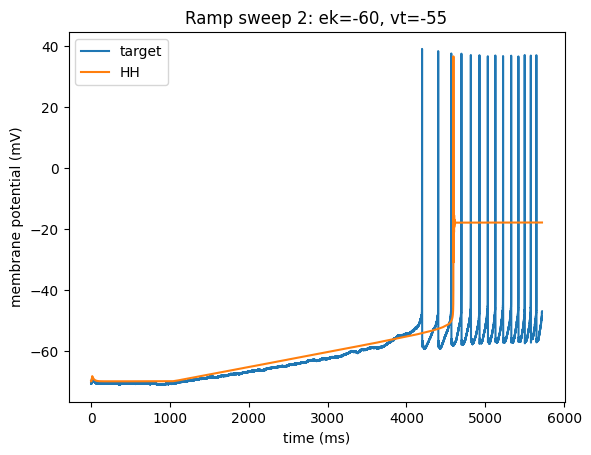

In [36]:
create_comparison_together(ramp_full_out[2], hh_ramp_full_1[2]*1000, d2_title='HH')
title('Ramp sweep 2: ek=-60, vt=-55')

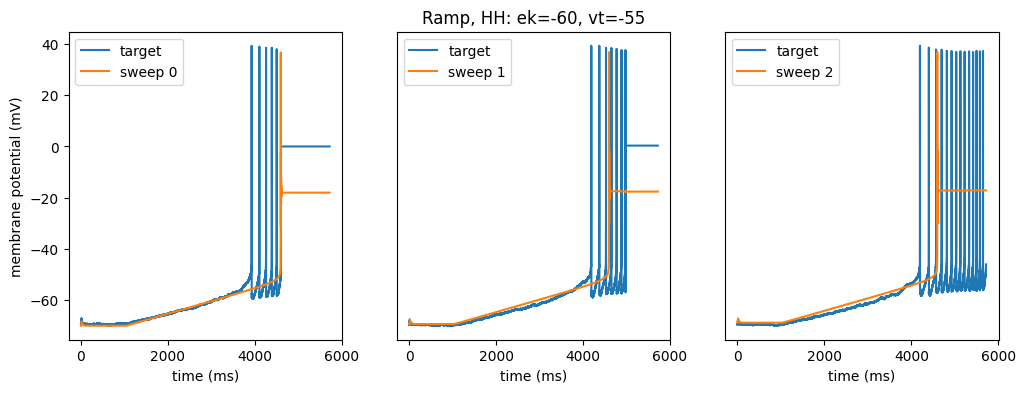

In [39]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(ramp_full_out[0], hh_ramp_full_1[0]*1000, d2_title='sweep 0')

subplot(1,3,2)
create_comparison_together(ramp_full_out[1], hh_ramp_full_1[1]*1000, d2_title='sweep 1')
title('Ramp, HH: ek=-60, vt=-55')
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)

subplot(1,3,3)
create_comparison_together(ramp_full_out[2], hh_ramp_full_1[2]*1000, d2_title='sweep 2')
ax = plt.gca()
ax.yaxis.set_visible(False)

Text(0.5, 1.0, 'Ramp, HH: ek=-60, vt=-55')

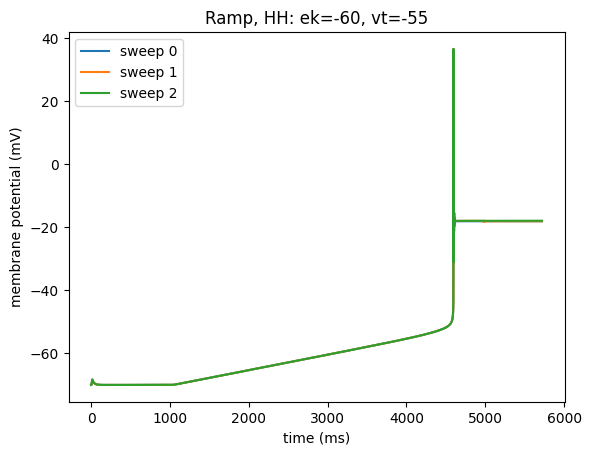

In [43]:
create_comparison_together_three(hh_ramp_full_1[0]*1000, hh_ramp_full_1[1]*1000, hh_ramp_full_1[2]*1000,\
                                 d1_title='sweep 0', d2_title='sweep 1', d3_title='sweep 2')
title('Ramp, HH: ek=-60, vt=-55')

(-45.0, 15.0)

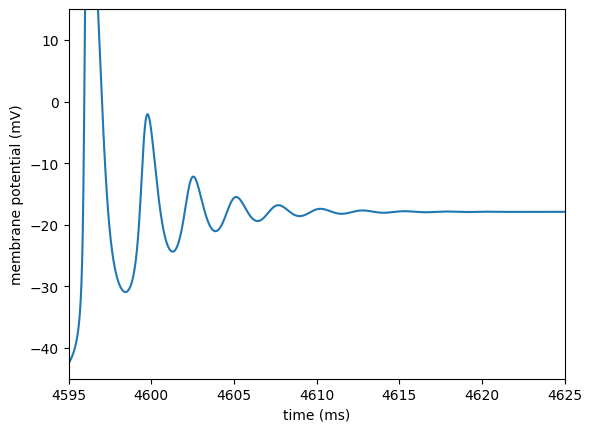

In [60]:
one_plot(hh_ramp_full_1[2]*1000)
xlim(4595, 4625)
ylim(-45, 15)

# BEST HH?

In [ ]:
hh_ramp_full_8 = run_hh(ramp_full_in_amps, ramp_full_out, ek=-60, ena=80, vt=-55, glmin=0, glmax=6, gkdmin=1)

# tt: 34m 37.7s

first fit:
Round 0: Best parameters g_kd=2.88529922 uS, g_na=4.42268606 uS, gl=4.63088853 nS (error: 556.4975246 mV^2)
Round 1: Best parameters g_kd=1.68244288 uS, g_na=2.83774056 uS, gl=5.27180103 nS (error: 541.83577769 mV^2)
Round 2: Best parameters g_kd=3.71668062 uS, g_na=2.32024338 uS, gl=5.45828824 nS (error: 539.6367617 mV^2)
Round 3: Best parameters g_kd=3.55954888 uS, g_na=1.83190471 uS, gl=5.68907171 nS (error: 537.98627961 mV^2)
Round 4: Best parameters g_kd=3.69220972 uS, g_na=1.57558936 uS, gl=5.46972468 nS (error: 537.63532 mV^2)
Round 5: Best parameters g_kd=3.58416302 uS, g_na=1.57025169 uS, gl=5.36160056 nS (error: 537.34802215 mV^2)
Round 6: Best parameters g_kd=3.4174059 uS, g_na=1.44814961 uS, gl=5.51774277 nS (error: 536.84635892 mV^2)
Round 7: Best parameters g_kd=3.4174059 uS, g_na=1.44814961 uS, gl=5.51774277 nS (error: 536.84635892 mV^2)
Round 8: Best parameters g_kd=3.4174059 uS, g_na=1.44814961 uS, gl=5.51774277 nS (error: 536.84635892 mV^2)
Round 9: Best pa

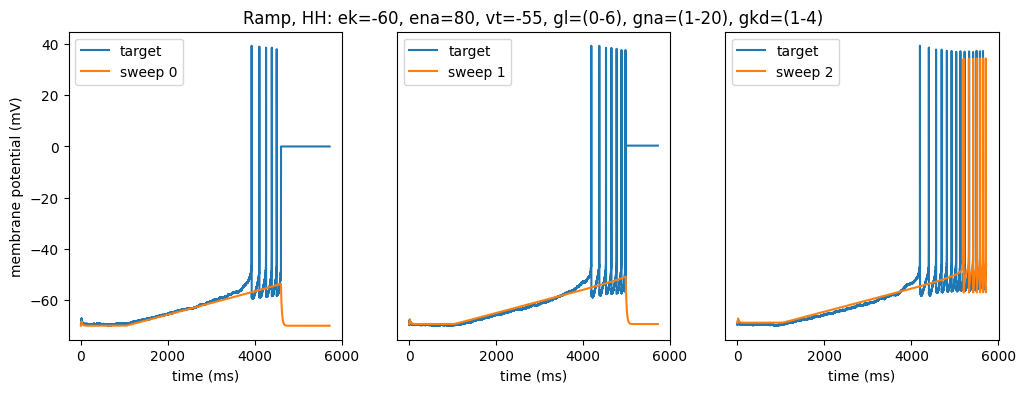

In [41]:
figure(figsize=(12,4))

subplot(1,3,1)
create_comparison_together(ramp_full_out[0], hh_ramp_full_8[0]*1000, d2_title='sweep 0')

subplot(1,3,2)
create_comparison_together(ramp_full_out[1], hh_ramp_full_8[1]*1000, d2_title='sweep 1')
title('Ramp, HH: ek=-60, ena=80, vt=-55, gl=(0-6), gna=(1-20), gkd=(1-4)')
ylabel('membrane potential (mV)')
ax = plt.gca()
ax.yaxis.set_visible(False)

subplot(1,3,3)
create_comparison_together(ramp_full_out[2], hh_ramp_full_8[2]*1000, d2_title='sweep 2')
ax = plt.gca()
ax.yaxis.set_visible(False)

Text(0.5, 1.0, 'Ramp, HH, sweep 2: ek=-60, ena=80, vt=-55, gl=(0-6), gna=(1-20), gkd=(1-4)')

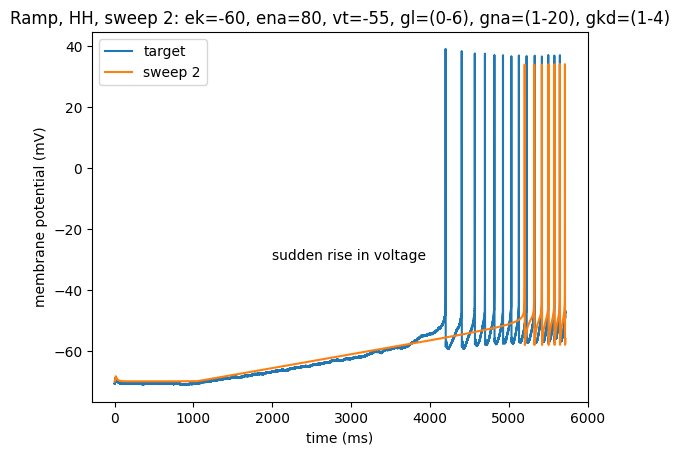

In [82]:
create_comparison_together(ramp_full_out[2], hh_ramp_full_8[2]*1000, d2_title='sweep 2')
text(2000, -30, 'sudden rise in voltage')
title('Ramp, HH, sweep 2: ek=-60, ena=80, vt=-55, gl=(0-6), gna=(1-20), gkd=(1-4)')

***
***

# INDIVIDUAL SWEEP 2

# LIF

In [ ]:
lif_ramp_s2_5_1 = run_lif(reshaped_ramp_sweep2_in, reshaped_ramp_sweep2_out, reset_var='v=-72*mV', thresh_var='v>-62*mV',\
                           r_min=100*10**6, r_max=110*10**6, t_min=0.04, t_max=0.05)

# tt: 14m 1.8s

first fit:
Round 0: Best parameters R=101.72023172 Mohm, tau=48.79053792 ms (error: 63.18243516 mV^2)
Round 1: Best parameters R=101.78281868 Mohm, tau=46.68625987 ms (error: 63.08327666 mV^2)
Round 2: Best parameters R=101.62347577 Mohm, tau=46.54573075 ms (error: 62.98666798 mV^2)
Round 3: Best parameters R=101.81053359 Mohm, tau=49.18648208 ms (error: 62.98631992 mV^2)
Round 4: Best parameters R=101.80372994 Mohm, tau=49.10286758 ms (error: 62.93996057 mV^2)
Round 5: Best parameters R=101.80372994 Mohm, tau=49.10286758 ms (error: 62.93996057 mV^2)
Round 6: Best parameters R=101.42917683 Mohm, tau=41.56522535 ms (error: 62.91490887 mV^2)
Round 7: Best parameters R=101.42917683 Mohm, tau=41.56522535 ms (error: 62.91490887 mV^2)
Round 8: Best parameters R=100.64390829 Mohm, tau=40.50866782 ms (error: 62.72855172 mV^2)
Round 9: Best parameters R=100.64390829 Mohm, tau=40.50866782 ms (error: 62.72855172 mV^2)


Text(0.5, 1.0, 'Ramp sweep 2 individual: reset=-72, thresh>-62, r=(100-110), tau=(0.04-0.05)')

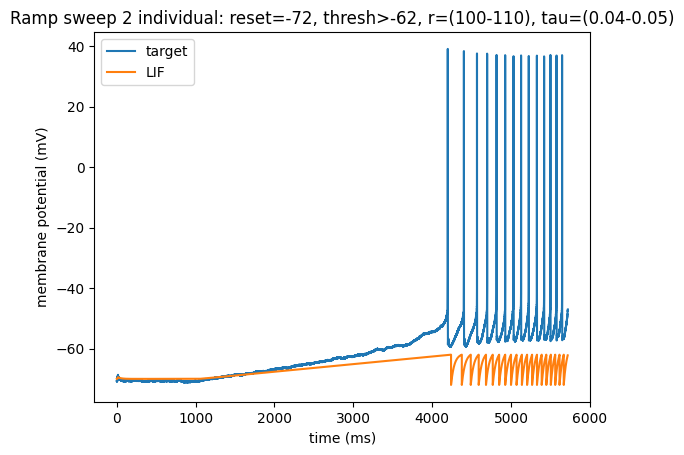

In [50]:
create_comparison_together(reshaped_ramp_sweep2_out[0], lif_ramp_s2_5_1[0]*1000, d2_title='LIF')
title('Ramp sweep 2 individual: reset=-72, thresh>-62, r=(100-110), tau=(0.04-0.05)')

(-80.0, -40.0)

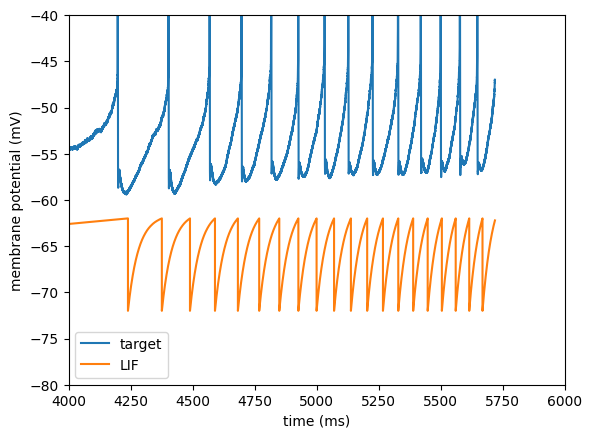

In [61]:
create_comparison_together(reshaped_ramp_sweep2_out[0], lif_ramp_s2_5_1[0]*1000, d2_title='LIF')
xlim(4000, 6000)
ylim(-80, -40)

Text(0.5, 1.0, 'Close up')

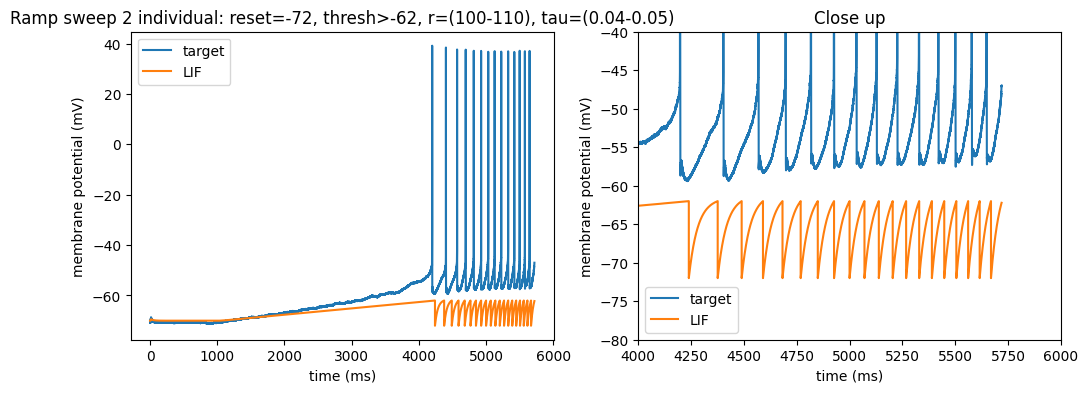

In [52]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together(reshaped_ramp_sweep2_out[0], lif_ramp_s2_5_1[0]*1000, d2_title='LIF')
title('Ramp sweep 2 individual: reset=-72, thresh>-62, r=(100-110), tau=(0.04-0.05)')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together(reshaped_ramp_sweep2_out[0], lif_ramp_s2_5_1[0]*1000, d2_title='LIF')
xlim(4000, 6000)
ylim(-80, -40)
# ax = plt.gca()
# ax.yaxis.set_visible(False)
title('Close up')

In [ ]:
lif_ramp_s2_5_2 = run_lif(reshaped_ramp_sweep2_in, reshaped_ramp_sweep2_out, reset_var='v=-72*mV', thresh_var='v>-62*mV',\
                           r_min=100*10**6, r_max=110*10**6, t_min=0.04, t_max=0.05)

# tt: 7m 33.6s

first fit:
Round 0: Best parameters R=101.75370697 Mohm, tau=44.12428589 ms (error: 63.03068024 mV^2)
Round 1: Best parameters R=101.75370697 Mohm, tau=44.12428589 ms (error: 63.03068024 mV^2)
Round 2: Best parameters R=101.00731513 Mohm, tau=45.06613657 ms (error: 62.98457972 mV^2)
Round 3: Best parameters R=100.59078432 Mohm, tau=47.83039611 ms (error: 62.94978059 mV^2)
Round 4: Best parameters R=100.52176119 Mohm, tau=47.13476089 ms (error: 62.73741127 mV^2)
Round 5: Best parameters R=100.31290633 Mohm, tau=47.05204856 ms (error: 62.71012284 mV^2)
Round 6: Best parameters R=100.26852673 Mohm, tau=44.35175046 ms (error: 62.67485101 mV^2)
Round 7: Best parameters R=100.18379774 Mohm, tau=44.21217012 ms (error: 62.62291062 mV^2)
Round 8: Best parameters R=100.12407688 Mohm, tau=43.50256782 ms (error: 62.37335062 mV^2)
Round 9: Best parameters R=100.12407688 Mohm, tau=43.50256782 ms (error: 62.37335062 mV^2)


Text(0.5, 1.0, 'Close up')

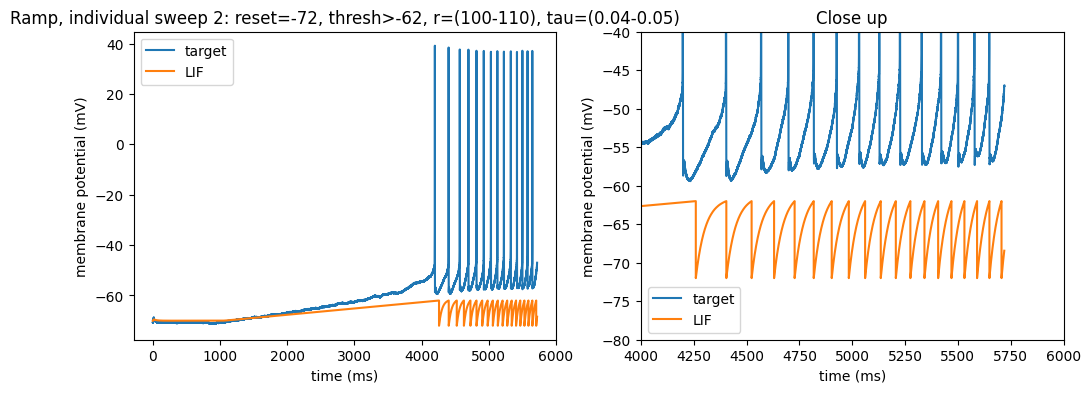

In [77]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together(reshaped_ramp_sweep2_out[0], lif_ramp_s2_5_2[0]*1000, d2_title='LIF')
title('Ramp, individual sweep 2: reset=-72, thresh>-62, r=(100-110), tau=(0.04-0.05)')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together(reshaped_ramp_sweep2_out[0], lif_ramp_s2_5_2[0]*1000, d2_title='LIF')
xlim(4000, 6000)
ylim(-80, -40)
title('Close up')

***
# ADEX

In [ ]:
adex_ramp_s2_0 = run_adex(reshaped_ramp_sweep2_in, reshaped_ramp_sweep2_out, vt_var=-60)

# tt: 10m 7.6s

first fit:
Round 0: Best parameters a=3.56282108 nS, b=63.48457764 pA, tauw=131.9328561 ms (error: 58.29842747 mV^2)
Round 1: Best parameters a=3.49930049 nS, b=29.4464295 pA, tauw=133.86958881 ms (error: 47.00935337 mV^2)
Round 2: Best parameters a=3.35095085 nS, b=24.54774191 pA, tauw=140.37133706 ms (error: 41.80319376 mV^2)
Round 3: Best parameters a=3.44308235 nS, b=21.02294678 pA, tauw=145.49885631 ms (error: 40.86639757 mV^2)
Round 4: Best parameters a=3.44308235 nS, b=21.02294678 pA, tauw=145.49885631 ms (error: 40.86639757 mV^2)
Round 5: Best parameters a=3.44308235 nS, b=21.02294678 pA, tauw=145.49885631 ms (error: 40.86639757 mV^2)
Round 6: Best parameters a=3.44308235 nS, b=21.02294678 pA, tauw=145.49885631 ms (error: 40.86639757 mV^2)
Round 7: Best parameters a=3.44308235 nS, b=21.02294678 pA, tauw=145.49885631 ms (error: 40.86639757 mV^2)
Round 8: Best parameters a=3.44308235 nS, b=21.02294678 pA, tauw=145.49885631 ms (error: 40.86639757 mV^2)
Round 9: Best parameters a=3

Text(0.5, 1.0, 'Ramp sweep 2 individual: initial')

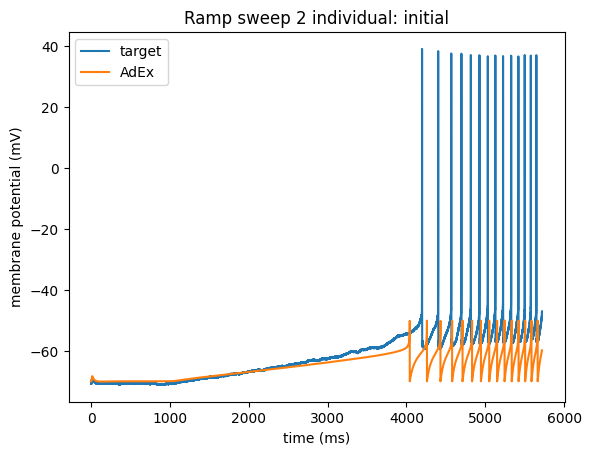

In [54]:
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0[0]*1000, d2_title='AdEx')
title('Ramp sweep 2 individual: initial')

(-80.0, -40.0)

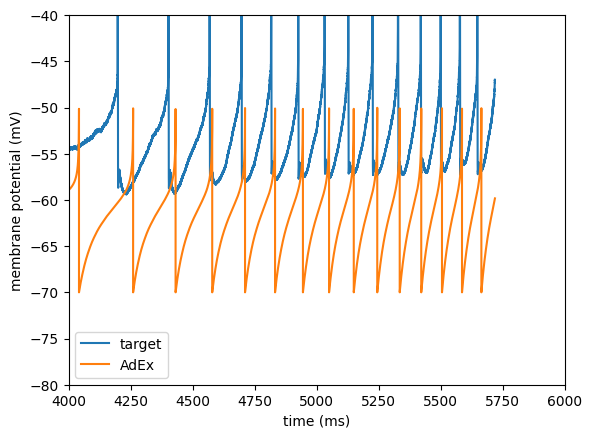

In [55]:
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0[0]*1000, d2_title='AdEx')
xlim(4_000, 6_000)
ylim(-80, -40)

Text(0.5, 1.0, 'Close up')

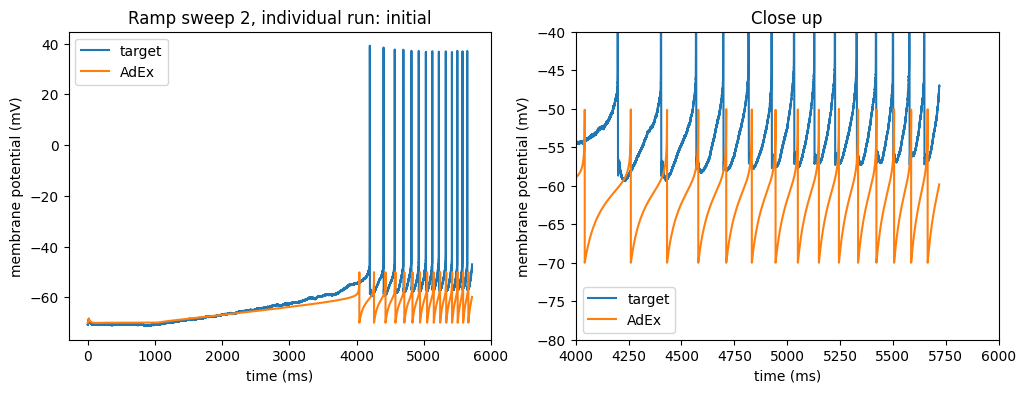

In [56]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0[0]*1000, d2_title='AdEx')
title('Ramp sweep 2, individual run: initial')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0[0]*1000, d2_title='AdEx')
xlim(4_000, 6_000)
ylim(-80, -40)
# ax = plt.gca()
# ax.yaxis.set_visible(False)
title('Close up')

In [ ]:
adex_ramp_s2_0_1 = run_adex(reshaped_ramp_sweep2_in, reshaped_ramp_sweep2_out, vt_var=-60)

# tt: 8m 18s

first fit:
Round 0: Best parameters a=1.83322334 nS, b=72.44890596 pA, tauw=129.7962675 ms (error: 67.31027931 mV^2)
Round 1: Best parameters a=2.7454014 nS, b=38.85422653 pA, tauw=130.76065708 ms (error: 49.81162719 mV^2)
Round 2: Best parameters a=3.27088568 nS, b=28.37013613 pA, tauw=129.52853935 ms (error: 44.03190156 mV^2)
Round 3: Best parameters a=3.50012451 nS, b=23.19754295 pA, tauw=130.64963578 ms (error: 42.14451306 mV^2)
Round 4: Best parameters a=3.78231899 nS, b=23.19754295 pA, tauw=130.64963578 ms (error: 40.10379892 mV^2)
Round 5: Best parameters a=3.84546884 nS, b=21.74203226 pA, tauw=128.73047138 ms (error: 38.72687869 mV^2)
Round 6: Best parameters a=3.84546884 nS, b=21.74203226 pA, tauw=128.73047138 ms (error: 38.72687869 mV^2)
Round 7: Best parameters a=3.84546884 nS, b=21.74203226 pA, tauw=128.73047138 ms (error: 38.72687869 mV^2)
Round 8: Best parameters a=3.83657974 nS, b=20.34795414 pA, tauw=138.44493583 ms (error: 38.12992102 mV^2)
Round 9: Best parameters a=3

Text(0.5, 1.0, 'Ramp sweep 2 individual: initial')

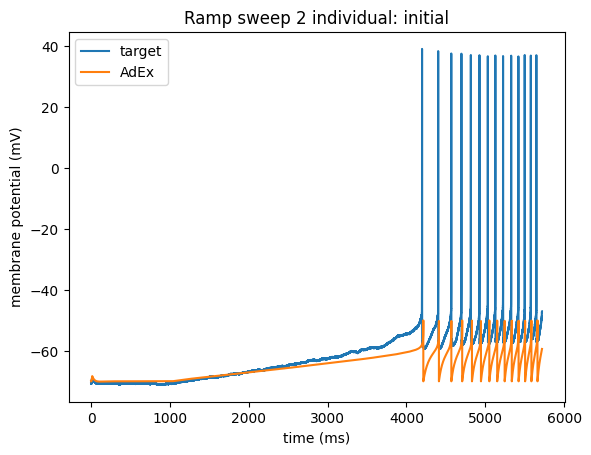

In [ ]:
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0_1[0]*1000, d2_title='AdEx')
title('Ramp, sweep 2 individual: initial')

(-80.0, -40.0)

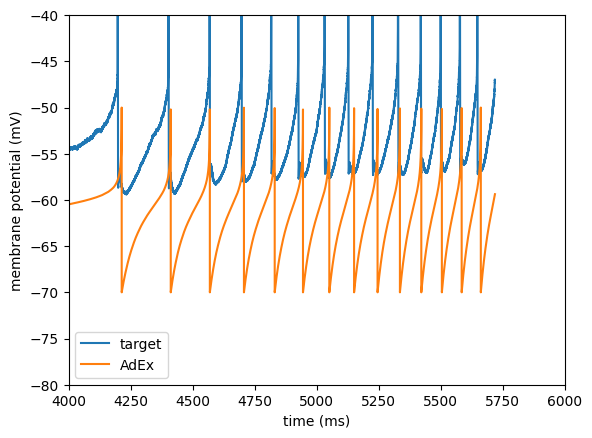

In [64]:
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0_1[0]*1000, d2_title='AdEx')
xlim(4_000, 6_000)
ylim(-80, -40)

Text(0.5, 1.0, 'Close up')

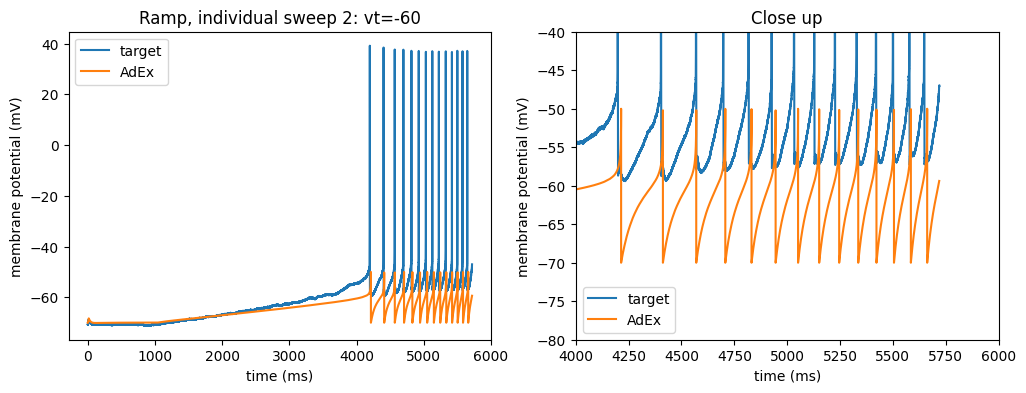

In [76]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0_1[0]*1000, d2_title='AdEx')
title('Ramp, individual sweep 2: vt=-60')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0_1[0]*1000, d2_title='AdEx')
xlim(4_000, 6_000)
ylim(-80, -40)
title('Close up')

In [ ]:
adex_ramp_s2_0_2 = run_adex(reshaped_ramp_sweep2_in, reshaped_ramp_sweep2_out, vt_var=-60)

# tt: 8m 48.9s

first fit:
Round 0: Best parameters a=3.28312914 nS, b=66.85826019 pA, tauw=150.87053138 ms (error: 62.17067109 mV^2)
Round 1: Best parameters a=3.15750586 nS, b=33.64694696 pA, tauw=151.19159947 ms (error: 47.80359703 mV^2)
Round 2: Best parameters a=3.31420496 nS, b=28.16303166 pA, tauw=151.2654557 ms (error: 44.43051657 mV^2)
Round 3: Best parameters a=3.4332765 nS, b=24.51234317 pA, tauw=126.69405791 ms (error: 41.63163114 mV^2)
Round 4: Best parameters a=3.4332765 nS, b=24.51234317 pA, tauw=126.69405791 ms (error: 41.63163114 mV^2)
Round 5: Best parameters a=3.4332765 nS, b=24.51234317 pA, tauw=126.69405791 ms (error: 41.63163114 mV^2)
Round 6: Best parameters a=3.41086048 nS, b=25.87121066 pA, tauw=126.92801369 ms (error: 40.83931367 mV^2)
Round 7: Best parameters a=3.41086048 nS, b=25.87121066 pA, tauw=126.92801369 ms (error: 40.83931367 mV^2)
Round 8: Best parameters a=3.41086048 nS, b=25.87121066 pA, tauw=126.92801369 ms (error: 40.83931367 mV^2)
Round 9: Best parameters a=3.4

Text(0.5, 1.0, 'Close up')

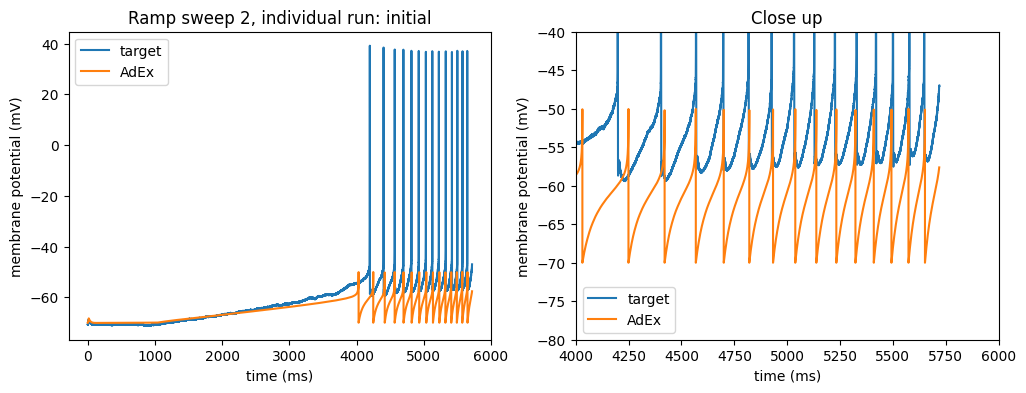

In [69]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0_2[0]*1000, d2_title='AdEx')
title('Ramp sweep 2, individual run: initial')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0_2[0]*1000, d2_title='AdEx')
xlim(4_000, 6_000)
ylim(-80, -40)
title('Close up')

In [ ]:
adex_ramp_s2_0_3 = run_adex(reshaped_ramp_sweep2_in, reshaped_ramp_sweep2_out, vt_var=-60)

# tt: 7m 22.1s

first fit:
Round 0: Best parameters a=1.63317139 nS, b=65.52608895 pA, tauw=147.15465961 ms (error: 65.61787783 mV^2)
Round 1: Best parameters a=2.45506833 nS, b=41.02001842 pA, tauw=150.63398077 ms (error: 53.06635737 mV^2)
Round 2: Best parameters a=2.12390495 nS, b=23.47379253 pA, tauw=150.61422764 ms (error: 46.91017281 mV^2)
Round 3: Best parameters a=2.51455615 nS, b=25.63871318 pA, tauw=155.97039233 ms (error: 43.33917119 mV^2)
Round 4: Best parameters a=3.20318555 nS, b=17.45416539 pA, tauw=156.95812602 ms (error: 42.87357091 mV^2)
Round 5: Best parameters a=3.435371 nS, b=24.13386065 pA, tauw=131.73160506 ms (error: 40.69243247 mV^2)
Round 6: Best parameters a=3.435371 nS, b=24.13386065 pA, tauw=131.73160506 ms (error: 40.69243247 mV^2)
Round 7: Best parameters a=3.40426797 nS, b=22.04421847 pA, tauw=146.00575672 ms (error: 39.81278832 mV^2)
Round 8: Best parameters a=3.40426797 nS, b=22.04421847 pA, tauw=146.00575672 ms (error: 39.81278832 mV^2)
Round 9: Best parameters a=3.4

Text(0.5, 1.0, 'Close up')

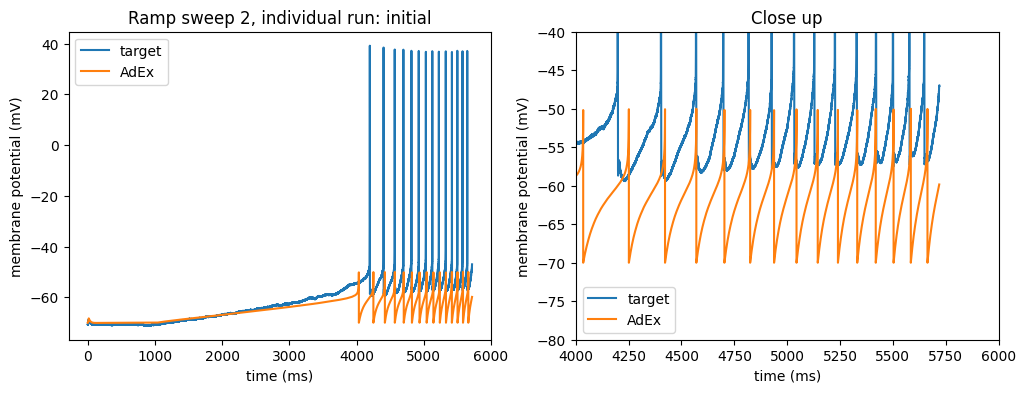

In [71]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0_3[0]*1000, d2_title='AdEx')
title('Ramp sweep 2, individual run: initial')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0_3[0]*1000, d2_title='AdEx')
xlim(4_000, 6_000)
ylim(-80, -40)
title('Close up')

In [ ]:
adex_ramp_s2_0_4 = run_adex(reshaped_ramp_sweep2_in, reshaped_ramp_sweep2_out, vt_var=-60)

# tt: 7m 32.2s

first fit:
Round 0: Best parameters a=3.02879504 nS, b=67.12951381 pA, tauw=129.62469933 ms (error: 62.22306238 mV^2)
Round 1: Best parameters a=3.55835539 nS, b=37.61170657 pA, tauw=144.75157789 ms (error: 49.9079243 mV^2)
Round 2: Best parameters a=2.87830154 nS, b=21.02579165 pA, tauw=125.57576282 ms (error: 44.31487495 mV^2)
Round 3: Best parameters a=3.71618864 nS, b=18.20550767 pA, tauw=123.42066596 ms (error: 42.10057565 mV^2)
Round 4: Best parameters a=3.77536211 nS, b=23.20266197 pA, tauw=125.40220461 ms (error: 40.82143567 mV^2)
Round 5: Best parameters a=3.79817792 nS, b=23.33192271 pA, tauw=122.49808704 ms (error: 39.87396256 mV^2)
Round 6: Best parameters a=3.83866802 nS, b=23.32428087 pA, tauw=122.1866198 ms (error: 38.84472328 mV^2)
Round 7: Best parameters a=3.83866802 nS, b=23.32428087 pA, tauw=122.1866198 ms (error: 38.84472328 mV^2)
Round 8: Best parameters a=3.83866802 nS, b=23.32428087 pA, tauw=122.1866198 ms (error: 38.84472328 mV^2)
Round 9: Best parameters a=3.8

Text(0.5, 1.0, 'Close up')

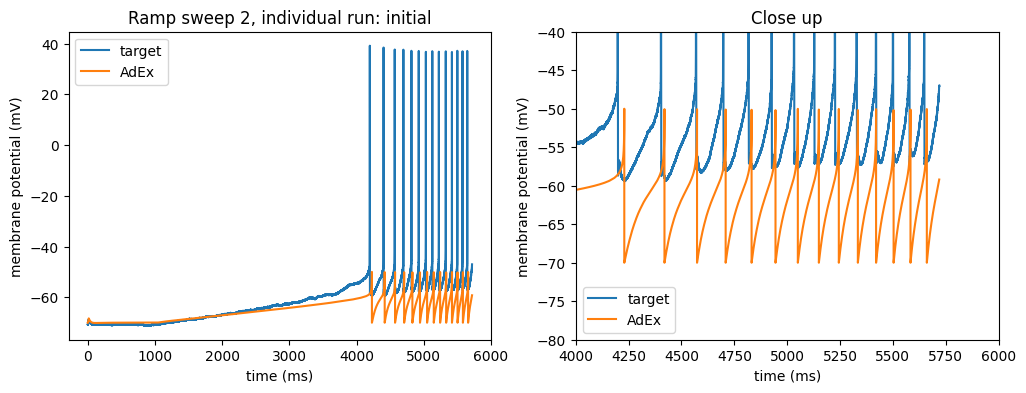

In [73]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0_4[0]*1000, d2_title='AdEx')
title('Ramp sweep 2, individual run: initial')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together(reshaped_ramp_sweep2_out[0], adex_ramp_s2_0_4[0]*1000, d2_title='AdEx')
xlim(4_000, 6_000)
ylim(-80, -40)
title('Close up')

***
# HH

In [ ]:
hh_ramp_s2_7 = run_hh(reshaped_ramp_sweep2_in, reshaped_ramp_sweep2_out, ek=-60, ena=50, vt=-55, glmin=0, glmax=6, gnamin=3, gkdmin=1)

# tt: 22m 30.5s

first fit:
Round 0: Best parameters g_kd=3.37860221 uS, g_na=6.08081263 uS, gl=4.9487777 nS (error: 38.88986793 mV^2)
Round 1: Best parameters g_kd=3.1810183 uS, g_na=4.45052844 uS, gl=5.39894402 nS (error: 29.15184644 mV^2)
Round 2: Best parameters g_kd=3.64987339 uS, g_na=4.75291511 uS, gl=5.56413686 nS (error: 25.58835992 mV^2)
Round 3: Best parameters g_kd=2.69442931 uS, g_na=4.3302756 uS, gl=5.80961835 nS (error: 23.99347537 mV^2)
Round 4: Best parameters g_kd=3.41790627 uS, g_na=4.7214037 uS, gl=5.83486514 nS (error: 22.08179731 mV^2)
Round 5: Best parameters g_kd=3.40877969 uS, g_na=4.01552573 uS, gl=5.89166242 nS (error: 20.71217265 mV^2)
Round 6: Best parameters g_kd=3.46727086 uS, g_na=3.64376287 uS, gl=5.84092809 nS (error: 20.49261392 mV^2)
Round 7: Best parameters g_kd=3.49346515 uS, g_na=3.45792298 uS, gl=5.91252498 nS (error: 19.5728059 mV^2)
Round 8: Best parameters g_kd=3.82730299 uS, g_na=3.40302266 uS, gl=5.88861792 nS (error: 18.23306472 mV^2)
Round 9: Best paramete

Text(0.5, 1.0, 'Ramp, individual sweep 2: ek=-60, ena=50, vt=-55, gl=(0-6), gna=(3-20), gkd=(1-4)')

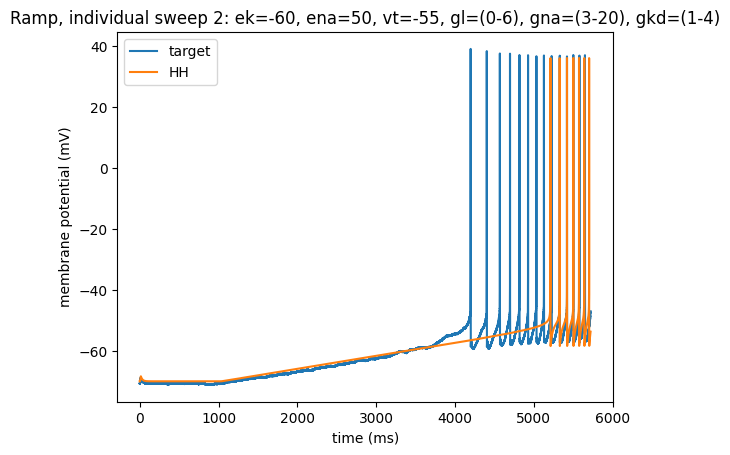

In [74]:
create_comparison_together(reshaped_ramp_sweep2_out[0], hh_ramp_s2_7[0]*1000, d2_title='HH')
title('Ramp, individual sweep 2: ek=-60, ena=50, vt=-55, gl=(0-6), gna=(3-20), gkd=(1-4)')

Text(0.5, 1.0, 'Close up')

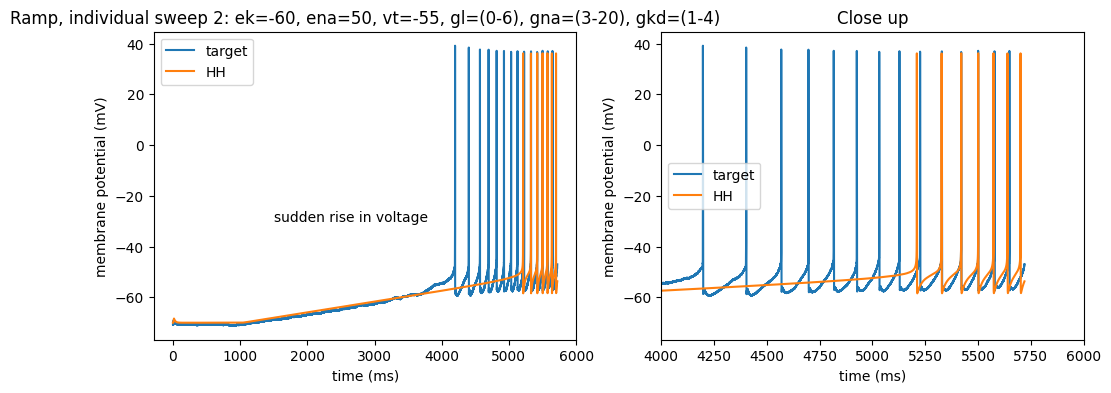

In [81]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together(reshaped_ramp_sweep2_out[0], hh_ramp_s2_7[0]*1000, d2_title='HH')
title('Ramp, individual sweep 2: ek=-60, ena=50, vt=-55, gl=(0-6), gna=(3-20), gkd=(1-4)')
text(1500, -30, 'sudden rise in voltage')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together(reshaped_ramp_sweep2_out[0], hh_ramp_s2_7[0]*1000, d2_title='HH')
title('Ramp sweep 2 individual: ena=50, gna=(3-20)')
xlim(4_000, 6_000)
# ylim(-65, -40)
title('Close up')

***
***

# COMPARISONS

***

Text(0.5, 1.0, 'Best LIF on Ramp stimulus')

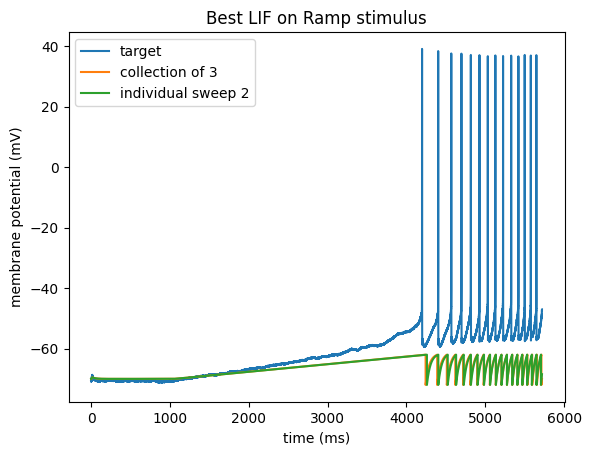

In [85]:
create_comparison_together_three(reshaped_ramp_sweep2_out[0], lif_ramp_full_17[2]*1000, lif_ramp_s2_5_2[0]*1000,\
                                 d2_title='collection of 3', d3_title='individual sweep 2')
title('Best LIF on Ramp stimulus')

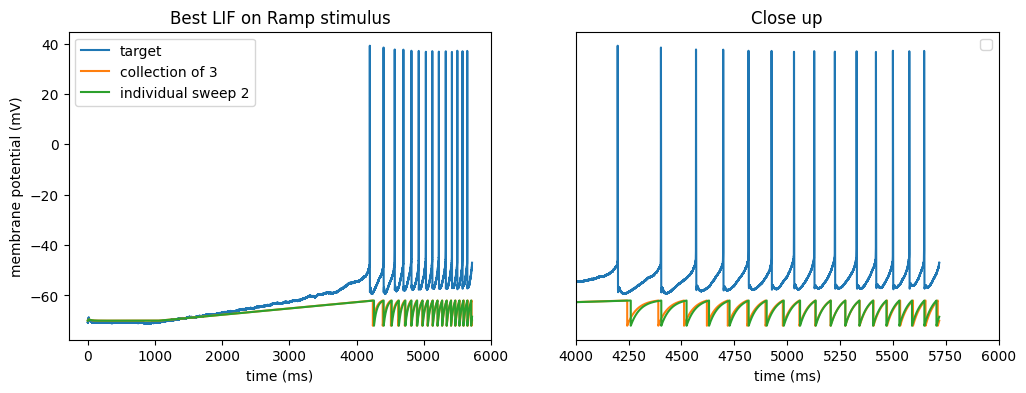

In [93]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together_three(reshaped_ramp_sweep2_out[0], lif_ramp_full_17[2]*1000, lif_ramp_s2_5_2[0]*1000,\
                                 d2_title='collection of 3', d3_title='individual sweep 2')
title('Best LIF on Ramp stimulus')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together_three(reshaped_ramp_sweep2_out[0], lif_ramp_full_17[2]*1000, lif_ramp_s2_5_2[0]*1000,\
                                 d1_title='', d2_title='', d3_title='')
title('Best LIF on Ramp stimulus')
xlim(4_000, 6_000)
# ylim(-65, -40)
title('Close up')
# yticks([])
ax = plt.gca()
ax.yaxis.set_visible(False)

Text(0.5, 1.0, 'Best AdEx on Ramp stimulus')

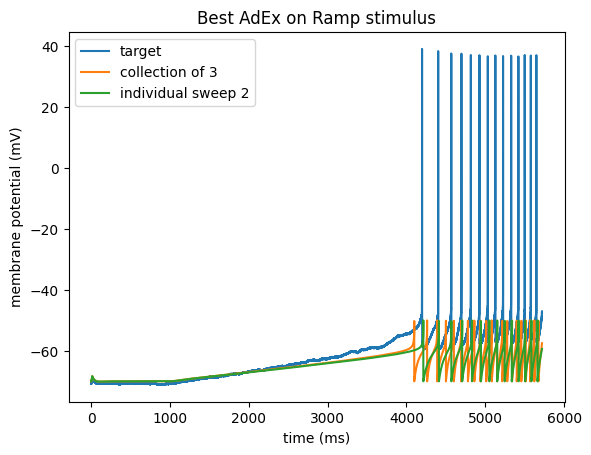

In [86]:
create_comparison_together_three(reshaped_ramp_sweep2_out[0], adex_ramp_full_1[2]*1000, adex_ramp_s2_0_1[0]*1000,\
                                 d2_title='collection of 3', d3_title='individual sweep 2')
title('Best AdEx on Ramp stimulus')

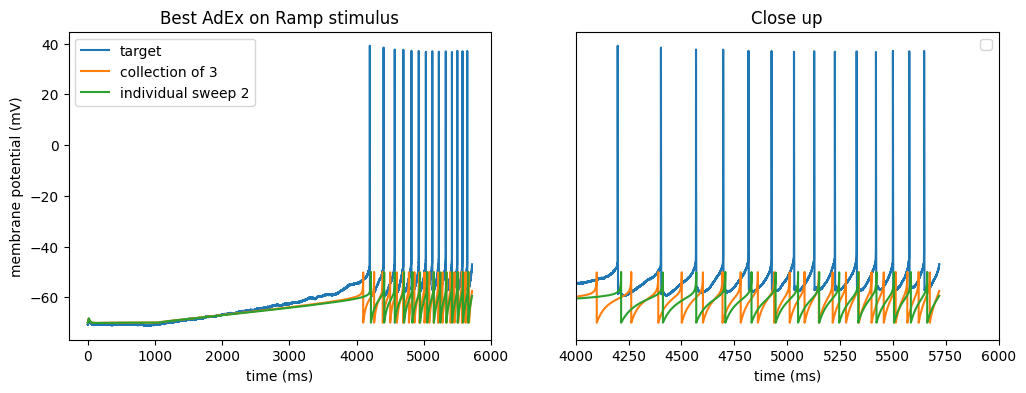

In [94]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together_three(reshaped_ramp_sweep2_out[0], adex_ramp_full_1[2]*1000, adex_ramp_s2_0_1[0]*1000,\
                                 d2_title='collection of 3', d3_title='individual sweep 2')
title('Best AdEx on Ramp stimulus')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together_three(reshaped_ramp_sweep2_out[0], adex_ramp_full_1[2]*1000, adex_ramp_s2_0_1[0]*1000,\
                                 d1_title='', d2_title='', d3_title='')
# title('Best LIF on Ramp stimulus')
xlim(4_000, 6_000)
# ylim(-65, -40)
title('Close up')
ax = plt.gca()
ax.yaxis.set_visible(False)

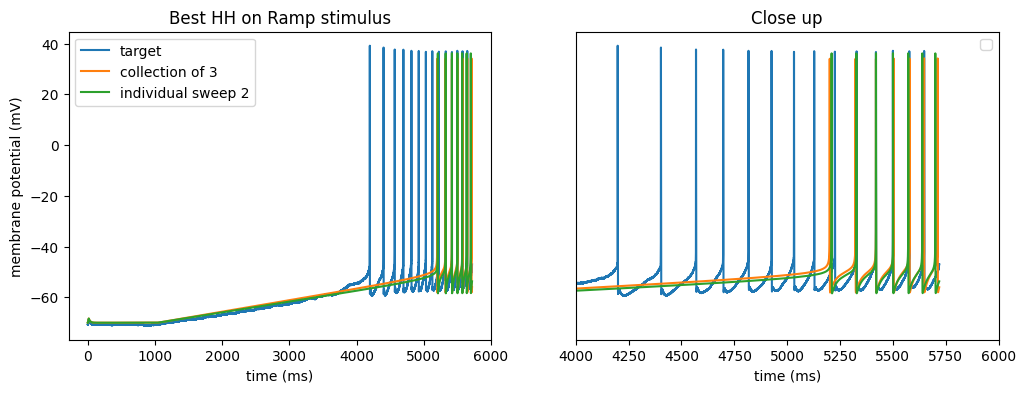

In [95]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together_three(reshaped_ramp_sweep2_out[0], hh_ramp_full_8[2]*1000, hh_ramp_s2_7[0]*1000,\
                                 d2_title='collection of 3', d3_title='individual sweep 2')
title('Best HH on Ramp stimulus')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together_three(reshaped_ramp_sweep2_out[0], hh_ramp_full_8[2]*1000, hh_ramp_s2_7[0]*1000,\
                                 d1_title='', d2_title='', d3_title='')
# title('Best LIF on Ramp stimulus')
xlim(4_000, 6_000)
# ylim(-65, -40)
title('Close up')
ax = plt.gca()
ax.yaxis.set_visible(False)

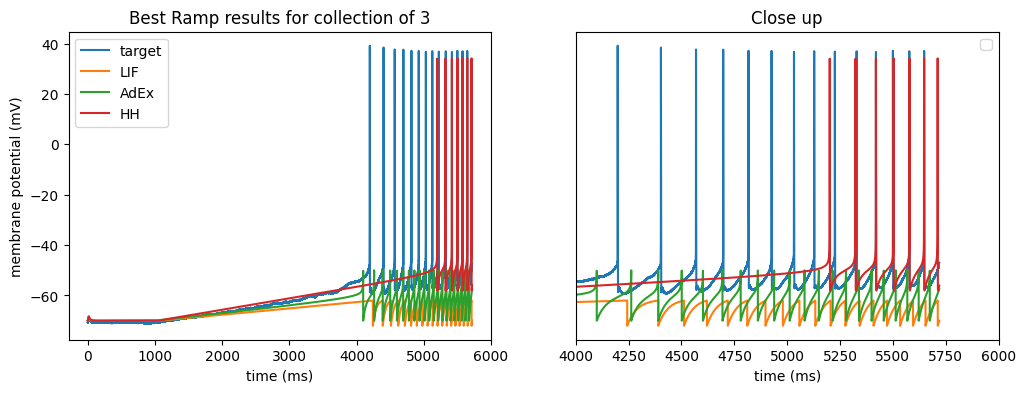

In [106]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together_four(ramp_full_out[2], lif_ramp_full_17[2]*1000, adex_ramp_full_1[2]*1000, hh_ramp_full_8[2]*1000, \
                                 d2_title='LIF', d3_title='AdEx', d4_title='HH')
title('Best Ramp results for collection of 3')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together_four(ramp_full_out[2], lif_ramp_full_17[2]*1000, adex_ramp_full_1[2]*1000, hh_ramp_full_8[2]*1000, \
                                 d1_title='', d2_title='', d3_title='', d4_title='')

# title('Best LIF on Ramp stimulus')
xlim(4_000, 6_000)
# ylim(-65, -40)
title('Close up')
ax = plt.gca()
ax.yaxis.set_visible(False)

WARNING    c:\Users\yjk16\OneDrive\Desktop\CS Master's\Dissertation\diss files\general_functions.py:509: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()
 [py.warnings]


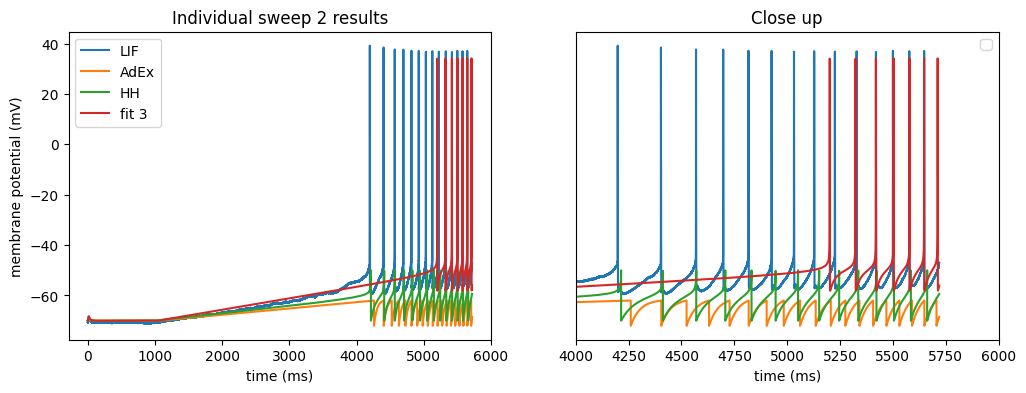

In [101]:
figure(figsize=(12,4))

subplot(1,2,1)
create_comparison_together_four(reshaped_ramp_sweep2_out[0], lif_ramp_s2_5_2[0]*1000, adex_ramp_s2_0_1[0]*1000, hh_ramp_full_8[2]*1000, \
                                 d1_title='LIF', d2_title='AdEx', d3_title='HH')
title('Individual sweep 2 results')
ylabel('membrane potential (mV)')

subplot(1,2,2)
create_comparison_together_four(reshaped_ramp_sweep2_out[0], lif_ramp_s2_5_2[0]*1000, adex_ramp_s2_0_1[0]*1000, hh_ramp_full_8[2]*1000, \
                                 d1_title='', d2_title='', d3_title='', d4_title='')
title('Close up')
xlim(4_000, 6_000)
# ylim(-65, -40)

ax = plt.gca()
ax.yaxis.set_visible(False)

WARNING    c:\Users\yjk16\OneDrive\Desktop\CS Master's\Dissertation\diss files\general_functions.py:509: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend()
 [py.warnings]


(-70.0, -40.0)

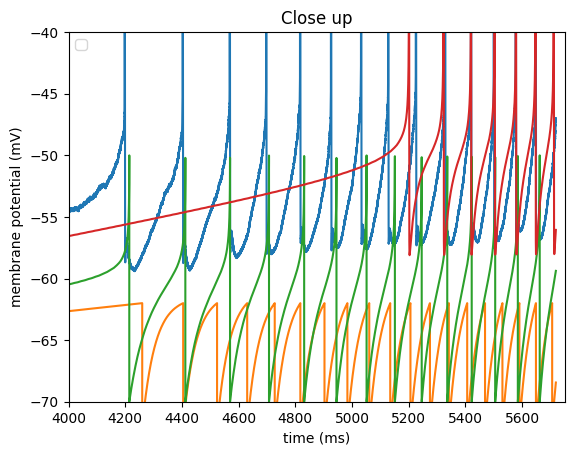

In [104]:
create_comparison_together_four(reshaped_ramp_sweep2_out[0], lif_ramp_s2_5_2[0]*1000, adex_ramp_s2_0_1[0]*1000, hh_ramp_full_8[2]*1000, \
                                 d1_title='', d2_title='', d3_title='', d4_title='')
title('Close up')
xlim(4_000, 5_750)
ylim(-70, -40)